In [19]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
plt.style.use('ggplot')

### Additionaly datasets with information of plants and over the counter drug spend 

In [20]:
otc_sales = pd.read_csv('otc_sales_category.csv')

In [21]:
otc_sales.sample(10)

,OTC Category,2015,2016,2017,2018
18,Heartburn,3160.0,3177.0,3197.0,3229.0
15,Foot Care,358.0,355.0,353.0,356.0
8,Eczema & Psoriasis,182.0,199.0,206.0,225.0
2,"Analgesics, External",625.0,694.0,796.0,861.0
20,Jock Itch,53.0,56.0,57.0,57.0
12,Feminine Itch & Yeast Treatment,257.0,248.0,249.0,253.0
5,Antiperspirants,2762.0,2852.0,2911.0,3034.0
32,NaN,NaN,NaN,NaN,NaN
14,First Aid,1213.0,1236.0,1251.0,1269.0
23,Lip/Oral Treatment,1098.0,1108.0,1127.0,1189.0


In [22]:
species = pd.read_csv('species.csv')

/Users/itadmin/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
species.columns

Index(['Species ID', 'Park Name', 'Category', 'Order', 'Family',
       'Scientific Name', 'Common Names', 'Record Status', 'Occurrence',
       'Nativeness', 'Abundance', 'Seasonality', 'Conservation Status',
       'Unnamed: 13'],
      dtype='object')

In [24]:
species['Scientific Name'] = species['Scientific Name'].apply(lambda s: s.lower())
species['Common Names'] = species['Common Names'].apply(lambda s: s.lower())

## Scapped dataset from https://www.anniesremedy.com/ 

In [25]:
# Read in csv
df = pd.read_csv('../web_scraping/Introduction_to_Scrapy/herb/herb/spiders/herbs.csv')

# clean up common name
# df['common_name'] = df['common_name'].str.split('\t')
# for i in range(df['common_name'].shape[0]):
#     df['common_name'][i] = df['common_name'][i][1]
    
# 
df.common_name[176] = "Medicinal Uses & Benefits of \tCinnamon  "
df = df.drop('botanical_name', axis = 1)

In [26]:
# Clean common_names to remove "How to use:"
common_name_lst = df.common_name.str.split('\t').to_list()
df.common_name = [x[1] for x in common_name_lst]

In [27]:
# Clean Link col to make 
link_lst = df.link.str.split('<200 https://www.anniesremedy.com/').to_list()

link_lst2 = [x[1].split('.php>') for x in link_lst]
df.link = [x[0] for x in link_lst2]
for i in range(len(df.link)):
    df.link[i] = df.link[i].replace('-', ' ')

In [28]:
df.medicinal_uses = df.medicinal_uses.str.replace('*', '').str.split(',')
df.properties = df.properties.str.replace('*', '').str.split(',')


In [29]:
df_text = df.copy()

In [30]:
df_text.folklore = df_text.folklore.str.replace('\n', '')
df_text.folklore = df_text.folklore.str.replace('\t', '')

df_text.description = df_text.description.str.replace('\n', '')
df_text.description = df_text.description.str.replace('\t', '')
df_text.description = df_text.description.str.replace('\r', '')


In [31]:
#df_text_folklore = df_text[df_text.folklore != '']

In [32]:
df_text.sample(10)

,common_name,description,folklore,link,medicinal_uses,properties
121,Gentian,Gentian herb has been used in European and Eas...,,gentiana lutea,"[ Chinese, Digestion, IBS, Liver, Nausea, ...","[ Antiparasite, Bitter, Carminative, Hepati..."
242,Beth Root,"Regional Traditions :, * ,Beth Root - , is on...",,trillium erectum beth root,"[ Cough, Menopause, Spring Tonics]","[ Anodyne, emetic, Expectorant]"
39,Oolong Tea,Oolong tea is unique because of its partial fe...,,camellia sinensis oolong tea,"[ Chinese, Chinese, Culinary/Kitchen, Diet/...","[ Antioxidant, Appetite Depressant, Astringe..."
47,Neem,Neem has been used as a traditional cure in A...,,azadirachta indica neem,"[ Athletes Foot/Ringworm, Ayurvedic, Dental/...","[ Antibacterial, Antifungal, Antiparasite, ..."
93,Hops,"Aged hops are sedatives, fresh hops provide ,...",The ripened cones of the female Hop plant are ...,humulus lupulus hops,"[ Anxiety, Bruises/sprains, Culinary/Kitchen...","[ Analgesic, Anodyne, Anxiety, Bitter, Cal..."
16,Quassia,Quassia Bark extract is said to be many times ...,,quassia amara,[ South_American],"[ Bitter, Digestive, emetic, Febrifuge, In..."
217,Cascara Sagrada,"Dried, aged cascara sagrada bark is often pres...",,rhamnus purshiana cascara sagrada,[ Constipation],"[ Cathartic, Purgative]"
311,Ylang-Ylang,NaN,"Filipinos used the flowers of the cananga, (Yl...",cananga adorata ylang ylang,"[ Aphrodisiac, Aromatherapy, Depression, Hy...","[ Antidepressant, Aphrodisiac, Aromatic, Ca..."
55,Peppermint,"We have had a long love affair with mints, as ...",,mentha piperita peppermint,"[ Aromatherapy, Bronchitis, Cardiovascular, ...","[ Adaptogens, Analgesic, Anodyne, Antifunga..."
302,Red Root,The healing uses of the plant were known to th...,"Dried leaves were used as a tea substitute, in...",ceanothus americanus red root,"[ Cough, Dental/Oral Care, Sore Throat]","[ Astringent, Expectorant, Styptic]"


In [33]:
#df_text_folklore.folklore.isna().sum()

In [34]:

df.merge(species, how = 'inner', left_on='common_name', right_on='Common Names')
# df.merge(species, how = 'inner', left_on='link', right_on='Scientific Name')

,common_name,description,folklore,link,medicinal_uses,properties,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13


### Working on medicinal uses
- What are all the medicinal uses?
- How to take out the geographic references
- combine into a list and take set 
- choose a handful and explore

In [35]:
df_medicinal = df[['common_name', 'link', 'medicinal_uses']]
df_medicinal = df_medicinal.dropna(axis = 0)

In [36]:
lst_med = df_medicinal.medicinal_uses.to_list()
#[el for lst in nested_list for el in lst]
lst_med = [el for lst in lst_med for el in lst]

In [37]:
len(set([el for lst in lst_med for el in lst]))

51

In [38]:
lst_med

[' Arthritis',
 ' Cholesterol',
 ' Culinary/Kitchen',
 ' Massage Oils',
 ' North American',
 ' Nutrition',
 ' Skin Care',
 ' Constipation',
 ' Parasites/worms',
 ' Aromatherapy',
 ' Cellulite',
 ' Cuts & Wounds',
 ' Deodorants/Perfumes',
 ' Detoxification',
 ' Facial Care',
 ' Flu',
 ' Varicose Veins',
 ' Amenorrhea',
 ' Aphrodisiac',
 ' Bruises/sprains',
 ' Cancer Prevention',
 ' Chinese',
 ' Dysmenorrhea',
 ' Female Hormones',
 ' Immune',
 ' Liver',
 ' Longevity Tonics',
 ' Menopause',
 ' Menorrhagia',
 ' Nerve/Back Pain',
 ' PMS',
 ' Allergies',
 ' Congestion',
 ' Eyes/Vision',
 ' Sinus',
 ' Acne ',
 ' Eczema',
 ' Liver',
 ' Cardiovascular',
 ' Chinese',
 ' Cholesterol',
 ' Hypertension',
 ' Immune',
 ' Longevity Tonics',
 ' Stress',
 ' Aromatherapy',
 ' Bronchitis',
 ' Bruises/sprains',
 ' Burns',
 ' Cardiovascular',
 ' Congestion',
 ' Congestion',
 ' Dental/Oral Care',
 ' Facial Care',
 ' Flu',
 ' Herpes/Cold Sores',
 ' Hypertension',
 ' IBS',
 ' Insect Repellent',
 ' Diabetes',
 

In [39]:
unique_medicinal_uses = set([el for lst in lst_med for el in lst])

In [40]:
def count_frequency(lst): 
    freq = {} 
    for item in lst: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    return freq

In [41]:
med_freq = count_frequency(lst_med)

In [42]:
#med_freq = sorted(med_freq.items(), key=lambda kv: kv[1])

In [43]:
med_freq

{' Arthritis': 20,
 ' Cholesterol': 19,
 ' Culinary/Kitchen': 66,
 ' Massage Oils': 11,
 ' North American': 2,
 ' Nutrition': 33,
 ' Skin Care': 29,
 ' Constipation': 12,
 ' Parasites/worms': 20,
 ' Aromatherapy': 57,
 ' Cellulite': 16,
 ' Cuts & Wounds': 43,
 ' Deodorants/Perfumes': 7,
 ' Detoxification': 7,
 ' Facial Care': 29,
 ' Flu': 17,
 ' Varicose Veins': 9,
 ' Amenorrhea': 15,
 ' Aphrodisiac': 20,
 ' Bruises/sprains': 15,
 ' Cancer Prevention': 25,
 ' Chinese': 36,
 ' Dysmenorrhea': 16,
 ' Female Hormones': 16,
 ' Immune': 23,
 ' Liver': 23,
 ' Longevity Tonics': 37,
 ' Menopause': 14,
 ' Menorrhagia': 12,
 ' Nerve/Back Pain': 21,
 ' PMS': 9,
 ' Allergies': 10,
 ' Congestion': 35,
 ' Eyes/Vision': 16,
 ' Sinus': 9,
 ' Acne ': 13,
 ' Eczema': 27,
 ' Cardiovascular': 40,
 ' Hypertension': 30,
 ' Stress': 13,
 ' Bronchitis': 38,
 ' Burns': 24,
 ' Dental/Oral Care': 20,
 ' Herpes/Cold Sores': 11,
 ' IBS': 30,
 ' Insect Repellent': 29,
 ' Diabetes': 19,
 ' Bladder Infection (UTI)': 

In [44]:
data_hist = pd.DataFrame.from_dict(med_freq, orient = 'index', columns= ["frequency"])

(array([19., 24., 32.,  9., 11.,  5.,  5.,  0.,  1.,  1.]),
 array([ 1. ,  7.5, 14. , 20.5, 27. , 33.5, 40. , 46.5, 53. , 59.5, 66. ]),
 <a list of 10 Patch objects>)

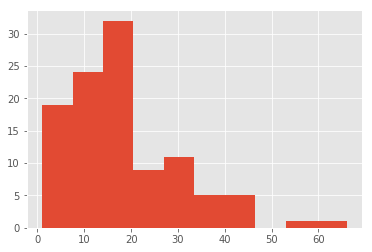

In [45]:
plt.hist(data_hist['frequency'])

([array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0.

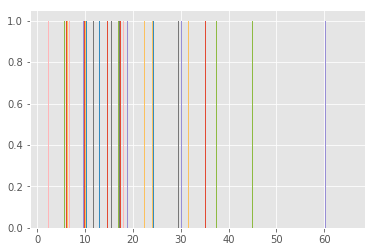

In [46]:
plt.hist(data_hist)

## Properties

In [47]:
df_properties = df[['common_name', 'link', 'properties']]
df_properties = df_properties.dropna(axis = 0)

In [48]:
lst_prop = df_properties.properties.to_list()
#[el for lst in nested_list for el in lst]
len([el for lst in lst_prop for el in lst])
lst_prop = [el for lst in lst_prop for el in lst]

In [49]:
unique_properties_uses = set([el for lst in lst_prop for el in lst])

In [50]:
#unique_properties_uses

In [51]:
count_frequency(lst_prop)

{' Astringent': 112,
 ' Carminative': 43,
 ' Cholagogue': 27,
 ' EFA': 13,
 ' Emollient': 24,
 ' Vulnerary': 43,
 ' Analgesic': 76,
 ' Hepatic': 28,
 ' Laxative': 25,
 ' Styptic': 16,
 ' Vermifuge': 44,
 ' Antirheumatic': 33,
 ' Antispasmodic': 61,
 ' Aromatic': 78,
 ' Calm': 46,
 ' Depurative': 74,
 ' Diuretic': 80,
 ' Muscle Relaxant': 14,
 ' Skin tonic': 31,
 ' Stress': 17,
 ' Vasoconstrictor': 5,
 ' Adaptogens': 19,
 ' Antidepressant': 19,
 ' AntiViral': 38,
 ' Aphrodisiac': 29,
 ' Phytoestrogen': 10,
 ' Stimulant': 43,
 ' Anodyne': 49,
 ' Bitter': 42,
 ' Digestive': 37,
 ' Sedative': 45,
 ' Stomachic': 28,
 ' Antioxidant': 51,
 ' Cordial': 34,
 ' Hypotensive': 28,
 ' Immunostimulant': 27,
 ' Tonic': 27,
 ' Vasodilator': 10,
 ' Cicatrisant': 11,
 ' Diaphoretic': 44,
 ' Emmenagogue': 66,
 ' Expectorant': 39,
 ' Febrifuge': 47,
 ' Hypertensive': 7,
 ' Nervine': 65,
 ' Hypoglycemic': 15,
 ' Antibacterial': 73,
 ' Circulation': 16,
 ' Energize': 10,
 ' Mental Clarity': 17,
 ' Rubefacie

### Text Analysis 

In [52]:
df_text = df_text.dropna(axis = 0)

In [53]:
#for i in range(len(df_text['medicinal_uses'])):
print(df_text['medicinal_uses'][0])
df_text['medicinal_uses'].apply(lambda l: l.strip())

#df_text['medicinal_uses'].apply(lambda l: any(l in [' Arthritis', ' Massage Oils'])

SyntaxError: unexpected EOF while parsing (<ipython-input-53-7459bc99f133>, line 5)

#### Makes everything lowercase

In [65]:
df_text.common_name = df_text.common_name.str.lower() 
df_text.folklore = df_text.folklore.str.lower()         # Do we want everything to be lower in folklore and may not be able to find location?
df_text.description = df_text.description.str.lower()

In [ ]:
df_text['medicinal_uses'] = df_text['medicinal_uses'].apply(lambda l: [el.strip() for el in l])

In [ ]:
df_text['medicinal_uses'].apply(lambda l: [el == 'Asthma' for el in l])

In [ ]:
sum(df_text.medicinal_uses.isna())

#### Find herbs nativeness while searching folklore
 - Find herbs that people smoked
 - see how many herbs where there location can be identified

In [66]:
df_text.sample(10)

,common_name,description,folklore,link,medicinal_uses,properties
341,wormwood,", ,wormwood is used today mainly as a ,, in f...",,artemisia absinthium wormwood,"[ Gout, IBS, Insect Repellent, Liver, Para...","[ Abortifacient, Antibacterial, Antiparasite..."
0,avocado,avocados are a favorite food because of the hi...,,persea americana avocado,"[ Arthritis, Cholesterol, Culinary/Kitchen, ...","[ Astringent, Carminative, Cholagogue, EFA,..."
23,poke root,pokeroot use is rooted in the folklore of the ...,,phytolacca americana poke root,"[ Cancer Prevention, Colds, Flu, Psoriasis,...","[ Antibacterial, Antirheumatic, Immunostimul..."
42,oak,the mighty oak tree looms large in both mythol...,,quercus robur oak bark,"[ Burns, Cuts & Wounds, Dental/Oral Care, D...","[ Anodyne, Antiscrofulous, Astringent, Depu..."
16,quassia,quassia bark extract is said to be many times ...,,quassia amara,[ South_American],"[ Bitter, Digestive, emetic, Febrifuge, In..."
281,almond,"sweet almond oil is a favorite in , as a , a...","almonds, as well as the oil pressed from them,...",prunus dulcis almond oil,"[ Massage Oils, Massage Oils, Skin Care]","[ Astringent, Emollient]"
141,epazote,the use of epazote can be traced back to the a...,other nonaromatic chennpodium species have a ...,chenopodium ambrosioidese epazote,"[ Culinary/Kitchen, Digestion, Parasites/wor...","[ Analgesic, Antiparasite, Carminative, Dia..."
39,oolong tea,oolong tea is unique because of its partial fe...,,camellia sinensis oolong tea,"[ Chinese, Chinese, Culinary/Kitchen, Diet/...","[ Antioxidant, Appetite Depressant, Astringe..."
252,linden,"the fragrant, yellowish flowers of the linden ...","the fragrant, yellowish flowers have been used...",tilia spp linden,"[ Anxiety, Cardiovascular, Colds, Herbal Te...","[ Cordial, Demulcent, Diaphoretic, Hypotens..."
105,myrrh,many ancient texts extol the healing properti...,,commiphora myrrha,"[ African, Aromatherapy, Athletes Foot/Ringw...","[ Aromatic, Astringent, Emmenagogue, Expect..."


In [67]:
df_folklore_text = df_text[df_text.folklore.str.len() > 5]

In [74]:
df_folklore_text[df_folklore_text.folklore.str.contains('smok')]

,common_name,description,folklore,link,medicinal_uses,properties
9,juniper,"juniper closely resembles ,, and like cypress...",many native american tribes of north america h...,juniperus communis juniper berries,"[ Acne , Aromatherapy, Bladder Infection (UT...","[ Antibacterial, Antirheumatic, Antispasmodi..."
71,lobelia,", ,lobelia acts as a relaxant in the presenc...",the name indian tobacco might have arisen eith...,lobelia inflata,"[ Addiction, Asthma, Bronchitis, Cough, So...","[ Aromatic, Breath, Diaphoretic, emetic, E..."
165,colts foot,coltsfoot is used as a respiratory disinfecta...,in former times a replica of the coltsfoot flo...,tussilago farfara colt foot,"[ Asthma, Bronchitis, Colds, Congestion, C...","[ Antiscrofulous, Antitussive, Astringent, ..."


In [77]:
df_text.to_csv('herb_text_full.csv', index= False)